In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## TOP ELEVEN CONTEXT

Nordeus' game Top Eleven - Be a Football Manager is played by millions from all over the world, generating
terabytes and terabytes of data for us to analyze.

There are two main ways Top Eleven managers can get rewards from video ads:

1. Regular Video Ads Placements
2. Video Ads placements within Live Events - VALEs

VALE is a relatively new feature in Top Eleven, and its goal is to monetize users that usually do not watch
video ads on regular placements, nor are in-game payers (spend money directly in the game/
InAppPurchase).

## HOW DOES VIDEO ADS LIVE EVENT (VALE) WORK?

VALE is a time-limited event, where managers can watch a video ad, and get one player attribute point as a
reward (one out of fifteen attributes). 

Here is how it works:
- Before watching every video ad, the manager chooses one out of three reward lanes,
ATTACK/MIDFIELD/DEFENCE. Each lane represents the subset of player attributes the manager
would like to get.
- The reward is received when the whole video is watched. Then, the manager chooses one of their
players to which the reward will be applied.
- Each reward has a random multiplier effect of 1,2,5 or 10 (e.g.: a multiplier of 10 means that 10,
instead of 1, player attribute points will be assigned to a previously chosen player).
- After every batch of four video ads is watched within VALE, the manager needs to wait 8 hours
before getting the new batch of 4 available video ads (8 hours after the fourth video in the batch).

## SO, WHAT IS THE GOAL OF THE PROJECT?
1. Answer whether VALE achieves its goal.
2. Do an exploratory analysis of the behavior of managers within VALE, and how the existence of VALE
impacts the behavior of watching video ads on regular placements.
3. Do an exploratory analysis of how the behavior of managers who are watching video ads, impacts the
behavior in other parts of the game

**task_table_1.csv — Daily User-Level Metrics**

* Data granularity: user × day
* Period: 2023-01-01 → 2023-03-25
* Seasons: 167–169

| Column name                            | Type    | Description                                                       |
| -------------------------------------- | ------- | ----------------------------------------------------------------- |
| date                                   | date    | Date in format `YYYY-MM-DD`                                       |
| season                                 | int     | Top Eleven season number (167–169)                                |
| season_day                             | int     | Day of season (1–28)                                              |
| global_user_id                         | bigint  | Unique user identifier                                            |
| registration_date                      | date    | User registration date                                            |
| cohort_day                             | int     | Days since registration (0 = registration day)                    |
| registration_country_name              | string  | Country at the moment of registration                             |
| registration_platform                  | string  | Registration platform (`Android`, `iOS`, `Windows`, `FB`, `Site`) |
| last_session_country                   | string  | Country of user’s last session on the date                        |
| last_session_platform                  | string  | Platform of user’s last session on the date                       |
| session_count_daily                    | int     | Number of sessions on the date                                    |
| playtime_daily                         | bigint  | Total playtime on the date (milliseconds)                         |
| training_count                         | bigint  | Number of squad training sessions                                 |
| iap_transaction_count_daily            | int     | Number of successful IAP transactions                             |
| net_revenue_usd_iap_daily              | double  | Net IAP revenue in USD                                            |
| is_payer_lifetime                      | boolean | Whether user has ever made an IAP                                 |
| first_transaction_date_iap             | date    | Date of first lifetime IAP                                        |
| tokens_earned                          | bigint  | Tokens earned (excluding IAP)                                     |
| rest_boosters_earned                   | bigint  | Rest boosters earned (excluding IAP & token shop)                 |
| morale_boosters_earned                 | bigint  | Morale boosters earned (excluding IAP & token shop)               |
| treatment_boosters_earned              | bigint  | Treatment boosters earned (excluding IAP & token shop)            |
| rest_boosters_bought_for_tokens        | bigint  | Rest boosters bought for tokens                                   |
| morale_boosters_bought_for_tokens      | bigint  | Morale boosters bought for tokens                                 |
| treatment_boosters_bought_for_tokens   | bigint  | Treatment boosters bought for tokens                              |
| tokens_bought_by_iap                   | bigint  | Tokens bought via IAP                                             |
| rest_boosters_bought_by_iap            | bigint  | Rest boosters bought via IAP                                      |
| morale_boosters_bought_by_iap          | bigint  | Morale boosters bought via IAP                                    |
| treatment_boosters_bought_by_iap       | bigint  | Treatment boosters bought via IAP                                 |
| tokens_spent                           | bigint  | Tokens spent                                                      |
| rest_boosters_spent                    | bigint  | Rest boosters spent                                               |
| morale_boosters_spent                  | bigint  | Morale boosters spent                                             |
| treatment_boosters_spent               | bigint  | Treatment boosters spent                                          |
| tokens_stash                           | int     | Tokens balance at end of day                                      |
| rest_boosters_stash                    | int     | Rest boosters balance at end of day                               |
| morale_boosters_stash                  | int     | Morale boosters balance at end of day                             |
| treatment_boosters_stash               | int     | Treatment boosters balance at end of day                          |
| in_squad_auction_player_count          | bigint  | Players acquired via auctions                                     |
| tokens_spent_on_auction_player         | bigint  | Tokens spent on auction players                                   |
| in_squad_scout_count                   | bigint  | Players acquired via scouts                                       |
| tokens_spent_on_scout                  | bigint  | Tokens spent on scout players                                     |
| in_squad_daily_assistant_player_count  | bigint  | Players acquired via daily assistant                              |
| tokens_spent_on_daily_assistant_player | bigint  | Tokens spent on daily assistant players                           |
| in_squad_recommended_player_count      | bigint  | Players acquired via recommendations                              |
| tokens_spent_on_recommended_player     | bigint  | Tokens spent on recommended players                               |


In [2]:
us = pd.read_csv('task_table_1.csv') #User Stories 
us.head(10)

,date,season,season_day,global_user_id,registration_date,cohort_day,registration_country_name,registration_platform,last_session_country,last_session_platform,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,is_payer_lifetime,first_transaction_date_iap,tokens_earned,rest_boosters_earned,morale_boosters_earned,treatment_boosters_earned,rest_boosters_bought_for_tokens,morale_boosters_bought_for_tokens,treatment_boosters_bought_for_tokens,tokens_bought_by_iap,rest_boosters_bought_by_iap,morale_boosters_bought_by_iap,treatment_boosters_bought_by_iap,tokens_spent,rest_boosters_spent,morale_boosters_spent,treatment_boosters_spent,tokens_stash,rest_boosters_stash,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
0,2023-01-01,166,1,4297303153,2019-06-18,1293,Kenya,Android,Kenya,Android,2,688525,10,0,0.0,True,2019-06-20,15,43,26,21,0,0,0,0,0,0,0,14,4,16,0,18.0,54.0,35.0,646.0,0,0,0,0,1,14,0,0
1,2023-01-01,166,1,4297552523,2020-01-04,1093,Ghana,Android,Ghana,iOS,3,595488,4,0,0.0,False,NaN,9,33,21,28,0,0,0,0,0,0,0,0,0,0,0,95.0,41.0,287.0,128.0,0,0,0,0,0,0,0,0
2,2023-01-01,166,1,4297710244,2020-04-20,986,Mauritius,Android,Mauritius,Android,19,3488316,3,0,0.0,False,NaN,4,47,21,10,0,0,0,0,0,0,0,0,0,8,0,98.0,125.0,69.0,529.0,0,0,0,0,0,0,0,0
3,2023-01-01,166,1,4297972055,2020-11-09,783,Mauritius,Android,Mauritius,Android,1,486932,4,0,0.0,False,NaN,46,30,31,30,0,0,0,0,0,0,0,0,4,0,0,46.0,59.0,48.0,208.0,0,0,0,0,0,0,0,0
4,2023-01-01,166,1,4298294268,2021-06-09,571,Ghana,Android,Ghana,Android,5,1352790,3,0,0.0,True,2021-06-21,2,30,24,22,0,0,0,0,0,0,0,0,0,0,0,101.0,1347.0,464.0,361.0,0,0,0,0,0,0,0,0
5,2023-01-01,166,1,4298434786,2021-09-14,474,Kenya,Android,Kenya,Android,1,278370,2,0,0.0,False,NaN,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,9.0,32.0,13.0,288.0,0,0,0,0,0,0,0,0
6,2023-01-01,166,1,4298473442,2021-10-12,446,Togo,Android,Togo,Android,6,2674253,4,0,0.0,False,NaN,4,44,23,25,0,0,0,0,0,0,0,0,11,6,0,54.0,317.0,557.0,350.0,0,0,0,0,0,0,0,0
7,2023-01-01,166,1,4298543739,2021-11-23,404,Kenya,Android,Kenya,Android,5,1923266,1,0,0.0,False,NaN,1,9,4,0,0,0,0,0,0,0,0,0,0,0,0,45.0,43.0,45.0,30.0,0,0,0,0,0,0,0,0
8,2023-01-01,166,1,4298593570,2021-12-30,367,Senegal,iOS,Senegal,iOS,1,396252,4,0,0.0,False,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,10.0,194.0,80.0,304.0,0,0,0,0,0,0,0,0
9,2023-01-01,166,1,4298782668,2022-04-21,255,Reunion,Android,Reunion,Android,2,853570,0,0,0.0,False,NaN,11,19,14,17,0,0,0,0,0,0,0,0,0,0,0,22.0,40.0,63.0,881.0,0,0,0,0,0,0,0,0


In [3]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144826 entries, 0 to 144825
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   date                                    144826 non-null  object 
 1   season                                  144826 non-null  int64  
 2   season_day                              144826 non-null  int64  
 3   global_user_id                          144826 non-null  int64  
 4   registration_date                       144826 non-null  object 
 5   cohort_day                              144826 non-null  int64  
 6   registration_country_name               144826 non-null  object 
 7   registration_platform                   144826 non-null  object 
 8   last_session_country                    144630 non-null  object 
 9   last_session_platform                   144630 non-null  object 
 10  session_count_daily                     1448

In [4]:
us.describe() #Brief analysis of value distributions 

,season,season_day,global_user_id,cohort_day,session_count_daily,playtime_daily,training_count,iap_transaction_count_daily,net_revenue_usd_iap_daily,tokens_earned,rest_boosters_earned,morale_boosters_earned,treatment_boosters_earned,rest_boosters_bought_for_tokens,morale_boosters_bought_for_tokens,treatment_boosters_bought_for_tokens,tokens_bought_by_iap,rest_boosters_bought_by_iap,morale_boosters_bought_by_iap,treatment_boosters_bought_by_iap,tokens_spent,rest_boosters_spent,morale_boosters_spent,treatment_boosters_spent,tokens_stash,rest_boosters_stash,morale_boosters_stash,treatment_boosters_stash,in_squad_auction_player_count,tokens_spent_on_auction_player,in_squad_scout_count,tokens_spent_on_scout,in_squad_daily_assistant_player_count,tokens_spent_on_daily_assistant_player,in_squad_recommended_player_count,tokens_spent_on_recommended_player
count,144826.000000,144826.000000,1.448260e+05,144826.000000,144826.000000,1.448260e+05,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144824.000000,144824.000000,144824.000000,144824.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000,144826.000000
mean,166.978498,14.284127,1.027536e+12,294.366951,4.377598,2.319068e+06,2.884807,0.008638,0.038291,9.576015,12.118466,7.725346,7.847058,0.146348,0.014673,0.016503,0.350269,0.041153,0.009183,0.008652,4.977677,6.691803,4.166897,3.208091,40.232807,97.777205,130.578847,270.402344,0.305553,2.245937,0.008369,0.436151,0.013036,0.203541,0.011780,0.236553
std,0.818148,8.124977,6.806418e+12,551.818219,4.515256,3.191264e+06,13.731150,0.144409,0.905481,37.364913,31.421208,21.928338,41.748401,3.488259,0.566294,0.696768,17.204332,2.556855,0.598864,0.590506,39.449021,18.551599,7.002085,9.407487,116.563721,264.294534,292.066094,534.146387,0.857717,8.197745,0.125247,7.100772,0.113491,2.116268,0.107893,2.816943
min,166.000000,1.000000,7.765442e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,7.000000,2.061620e+11,14.000000,1.000000,4.390365e+05,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,14.000000,4.552702e+11,82.000000,3.000000,1.281215e+06,2.000000,0.000000,0.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,39.000000,39.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,21.000000,9.062407e+11,285.000000,6.000000,3.035264e+06,4.000000,0.000000,0.000000,6.000000,11.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,7.000000,0.000000,40.000000,75.000000,120.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,168.000000,28.000000,1.000041e+14,4394.000000,103.000000,7.795185e+07,2130.000000,12.000000,106.440815,10588.000000,2321.000000,2268.000000,2910.000000,965.000000,50.000000,90.000000,5000.000000,320.000000,100.000000,100.000000,10169.000000,1567.000000,360.000000,900.000000,5420.000000,6865.000000,4499.000000,7285.000000,31.000000,245.000000,12.000000,623.000000,2.000000,295.000000,1.000000,79.000000


In [26]:
print('Brief info about user stories data set'.upper())
print('Count of rows: ', us.shape[0])
print('Count of columns: ', us.shape[1])
print('Count of unique users: ', len(us['global_user_id'].unique()))

BRIEF INFO ABOUT USER STORIES DATA SET
Count of rows:  144826
Count of columns:  44
Count of unique users:  20420


**task_table_2.csv — Video Ads Events**
* Data granularity: one row = one video ad watched

| Column name      | Type      | Description                                                                             |
| ---------------- | --------- | --------------------------------------------------------------------------------------- |
| global_user_id   | bigint    | Unique user identifier                                                                  |
| time_utc         | timestamp | UTC timestamp when reward was earned                                                    |
| va_reward_reason | string    | Reason/reward for watching video ad. For VALE: `{lane}-{player_attribute}-{multiplier}` |
| revenue_usd      | double    | Net revenue in USD from the video ad                                                    |

In [6]:
ads = pd.read_csv('task_table_2.csv')
ads.head(10)

,date,global_user_id,time_utc,reason,net_revenue
0,2023-01-01,4297710244,2023-01-01 08:11:27.000,Training Bonus Multipliers,0.000439
1,2023-01-01,4297710244,2023-01-01 08:12:48.000,Training Bonus Multipliers,0.000535
2,2023-01-01,4297710244,2023-01-01 08:13:36.000,Training Bonus Multipliers,0.000543
3,2023-01-01,4297710244,2023-01-01 08:14:16.000,Shop Rests,0.000569
4,2023-01-01,4297710244,2023-01-01 08:14:17.000,Shop Rests,0.000439
5,2023-01-01,4297710244,2023-01-01 08:14:52.000,Shop Rests,0.000439
6,2023-01-01,4297710244,2023-01-01 08:15:55.000,Shop Rests,0.000236
7,2023-01-01,4297710244,2023-01-01 08:16:27.000,Shop Rests,0.000232
8,2023-01-01,4297710244,2023-01-01 08:16:47.000,Shop Rests,0.000164
9,2023-01-01,4297710244,2023-01-01 08:17:09.000,Shop Rests,0.000177


In [7]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823625 entries, 0 to 823624
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            823625 non-null  object 
 1   global_user_id  823625 non-null  int64  
 2   time_utc        823625 non-null  object 
 3   reason          823625 non-null  object 
 4   net_revenue     823625 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.4+ MB


In [8]:
ads.describe()

,global_user_id,net_revenue
count,8.236250e+05,823625.000000
mean,1.503327e+12,0.000834
std,9.587270e+12,0.001437
min,4.297303e+09,0.000005
25%,2.061627e+11,0.000257
50%,4.595627e+11,0.000527
75%,9.062422e+11,0.001001
max,1.000041e+14,0.254211


In [9]:
print('Brief info about ads  events data set'.upper())
print('Count of rows: ', ads.shape[0])
print('Count of columns: ', ads.shape[1])
print('Count of unique users: ', len(ads['global_user_id'].unique()))

BRIEF INFO ABOUT ADS  EVENTS DATA SET
Count of rows:  823625
Count of columns:  5
Count of unique users:  2925


In [10]:
ads['reason'].unique() #let's see the values to understand how we can understand that this is a VALE event or not 

array(['Training Bonus Multipliers', 'Shop Rests', 'Shop Morales',
       'Player Popup Morale', 'Physio Center Rest Multiple Players',
       'Player Popup Rest', 'Training Rest Tired Player', 'Shop Money',
       'Shop Treatments', 'ATTACK-ATTRIBUTE_FITNESS-2',
       'ATTACK-ATTRIBUTE_STRENGTH-5', 'ATTACK-ATTRIBUTE_DRIBBLING-2',
       'ATTACK-ATTRIBUTE_SHOOTING-1', 'ATTACK-ATTRIBUTE_CREATIVITY-2',
       'ATTACK-ATTRIBUTE_FINISHING-10', 'ATTACK-ATTRIBUTE_POSITIONING-1',
       'ATTACK-ATTRIBUTE_SHOOTING-2', 'ATTACK-ATTRIBUTE_HEADING-10',
       'ATTACK-ATTRIBUTE_STRENGTH-1', 'ATTACK-ATTRIBUTE_CREATIVITY-1',
       'ATTACK-ATTRIBUTE_FINISHING-1', 'DEFENCE-ATTRIBUTE_CROSSING-1',
       'ATTACK-ATTRIBUTE_SHOOTING-5', 'ATTACK-ATTRIBUTE_SPEED-10',
       'MIDFIELD-ATTRIBUTE_CREATIVITY-5', 'ATTACK-ATTRIBUTE_PASSING-2',
       'ATTACK-ATTRIBUTE_CROSSING-1', 'ATTACK-ATTRIBUTE_FINISHING-2',
       'ATTACK-ATTRIBUTE_POSITIONING-2', 'ATTACK-ATTRIBUTE_STRENGTH-2',
       'ATTACK-ATTRIBUTE_SPEE

We might see the pattern. 
For instance, 
- DEFENCE-ATTRIBUTE_FITNESS-10
- ATTACK-ATTRIBUTE_STRENGTH-10
- MIDFIELD-ATTRIBUTE_POSITIONING-5

The common pattern is there is a substring "ATTRIBUTE_" in each value 

In [11]:
# Let's add the column "is_vale" according to the pattern that we had found above

ads['is_vale'] = ads['reason'].str.contains('ATTRIBUTE_', na=False)
ads['is_vale'].value_counts()

is_vale
False    756464
True      67161
Name: count, dtype: int64

* VALE ≈ 8.1% 
* regular ads ≈ 91.9%

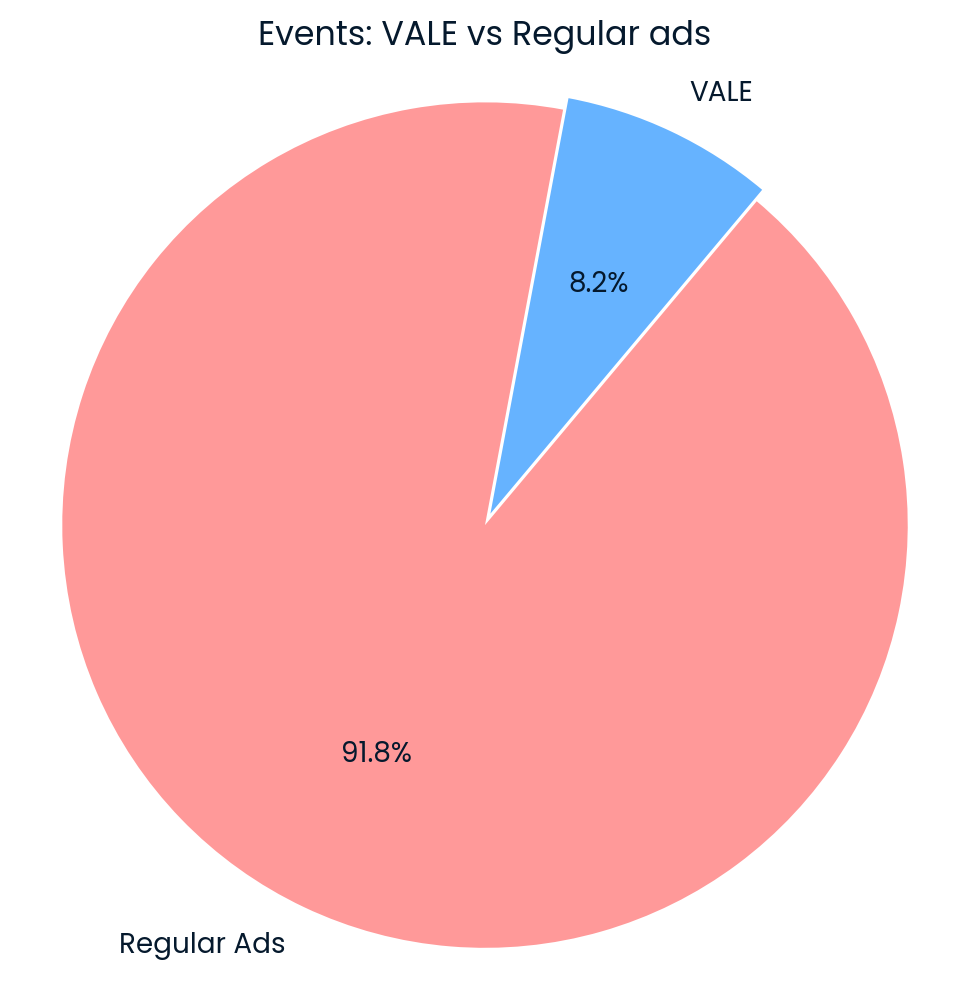

In [28]:
# Calculate counts
vale_count = ads['is_vale'].sum()
regular_count = (~ads['is_vale']).sum()

# Pie chart
labels = ['VALE', 'Regular Ads']
sizes = [vale_count, regular_count]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=50, colors=colors, explode=(0.03, 0))
plt.title('Events: VALE vs Regular ads')
plt.axis('equal')
plt.show()

In [29]:
#Create a special colum to simplify aggregation 

ads['vale_revenue_event'] = ads['net_revenue'].where(ads['is_vale'], 0)

# Let's group data by users and add vale_revenue (sum of net_revenue where is_vale is True):

user_ads = ads.groupby('global_user_id').agg(
    total_ads_count=('reason', 'count'),
    vale_count=('is_vale', 'sum'),
    net_revenue_ads =('net_revenue', 'sum'),
    vale_revenue=('vale_revenue_event', 'sum')
)
user_ads['regular_ads_revenue'] = user_ads['net_revenue_ads'] - user_ads['vale_revenue'] 
user_ads.head(10)

,total_ads_count,vale_count,net_revenue_ads,vale_revenue,regular_ads_revenue
global_user_id,,,,,
4297303153,352,28,0.342315,0.028398,0.313917
4297552523,77,32,0.108071,0.041732,0.066339
4297587670,226,1,0.367399,0.004495,0.362904
4297710244,2753,169,0.943859,0.063163,0.880696
4297972055,1,0,0.000809,0.000000,0.000809
4298171838,15,0,0.007890,0.000000,0.007890
4298294268,721,117,0.662366,0.116258,0.546108
4298449850,81,4,0.008580,0.000723,0.007857
4298473442,234,63,0.084951,0.022354,0.062597


In [30]:
#Let's create an additional dataset with payers 

users_iap = us.groupby('global_user_id').agg(
    if_iap = ('is_payer_lifetime', 'max'),
    net_iap_revenue = ('net_revenue_usd_iap_daily', 'sum')
)

users_iap.head(10)

,if_iap,net_iap_revenue
global_user_id,,
776544250,True,18.34088
1048615070,False,0.00000
4297303153,True,0.00000
4297552523,False,0.00000
4297587670,True,0.00000
4297710244,False,0.00000
4297745900,False,0.00000
4297972055,False,0.00000
4298171838,False,0.00000


In [31]:
#Join data together 

user_base = users_iap.merge(user_ads, how='left', on='global_user_id')

# Replace missing values with zeros (in columns related to advertising) 

ads_cols = [
    'total_ads_count',
    'vale_count',
    'net_revenue_ads',
    'vale_revenue',
    'regular_ads_revenue'
]

user_base[ads_cols] = user_base[ads_cols].fillna(0)

user_base['total_revenue'] = user_base['net_iap_revenue'] + user_base['net_revenue_ads']

user_base.shape

(20420, 8)

In [16]:
# Let's create a dataset with flags by user 
user_data_labeled = user_base.copy()

# is_payer (True or False)
user_data_labeled.rename(columns = {'if_iap': 'is_payer'}, inplace = True) 

#is_ads_user
user_data_labeled['is_ads_user'] = user_data_labeled['total_ads_count'] > 0

# is_vale_user
user_data_labeled['is_vale_user'] = user_data_labeled['vale_count'] > 0

# vale_only_user
user_data_labeled['vale_only_user'] = (user_data_labeled['vale_count'] > 0) & (user_data_labeled['total_ads_count'] == user_data_labeled['vale_count'])

# Check: how many users are in each segment (value_counts() by flags)
user_data_labeled['regular_only'] = (user_data_labeled['total_ads_count'] > 0) & (user_data_labeled['vale_count'] == 0)
user_data_labeled['mixed_user'] = (user_data_labeled['total_ads_count'] > user_data_labeled['vale_count']) & (user_data_labeled['vale_count'] > 0)
user_data_labeled[['is_payer', 'is_ads_user', 'is_vale_user', 'vale_only_user', 'regular_only','mixed_user']].apply(pd.Series.value_counts)

,is_payer,is_ads_user,is_vale_user,vale_only_user,regular_only,mixed_user
False,20067,17495,18528,20145,19387,18803
True,353,2925,1892,275,1033,1617


- Total users: 20,420

- Users who have seen the ad at least once: 2,925 (~14%)

- Users who have seen VALE at least once: 1,892 (~9%)

- Users who only watched VALE and did not watch regular ads: 275 (~1.3%)

**These 275 users are the key segment of the entire project.**

These are the very people for whom VALE was theoretically conceived.

In [17]:
vale_revenue = sum(user_base['vale_revenue'])
vale_only_revenue = sum(user_data_labeled[user_data_labeled['vale_only_user']]['vale_revenue']) 
print(f'Total value revenue: {vale_revenue:.2f} USD') 
print(f'Revenue from only vale users: {vale_only_revenue:.2f} USD')

Total value revenue: 65.71 USD
Revenue from only vale users: 3.23 USD


In [18]:
# Group advertising users by type (only not payers)

ads_users = user_data_labeled[(user_data_labeled['is_ads_user']) & (~user_data_labeled['is_payer'])]

ads_users['type'] = np.select(
    [
        ads_users['regular_only'],
        ads_users['vale_only_user'],
        ads_users['mixed_user']
    ],
    [
        'regular_only',
        'vale_only',
        'mixed_user'
    ],
    default='no_action'
)


ads_users_grouped = ads_users.groupby('type').agg(
    users = ('is_ads_user', 'count'),
    ads_revenue = ('net_revenue_ads', 'sum'),
)

ads_users_grouped['avg_ads_revenue_per_user'] = ads_users_grouped['ads_revenue'] / ads_users_grouped['users']
ads_users_grouped

,users,ads_revenue,avg_ads_revenue_per_user
type,,,
mixed_user,1395,439.547892,0.315088
regular_only,996,38.725320,0.038881
vale_only,265,2.456237,0.009269


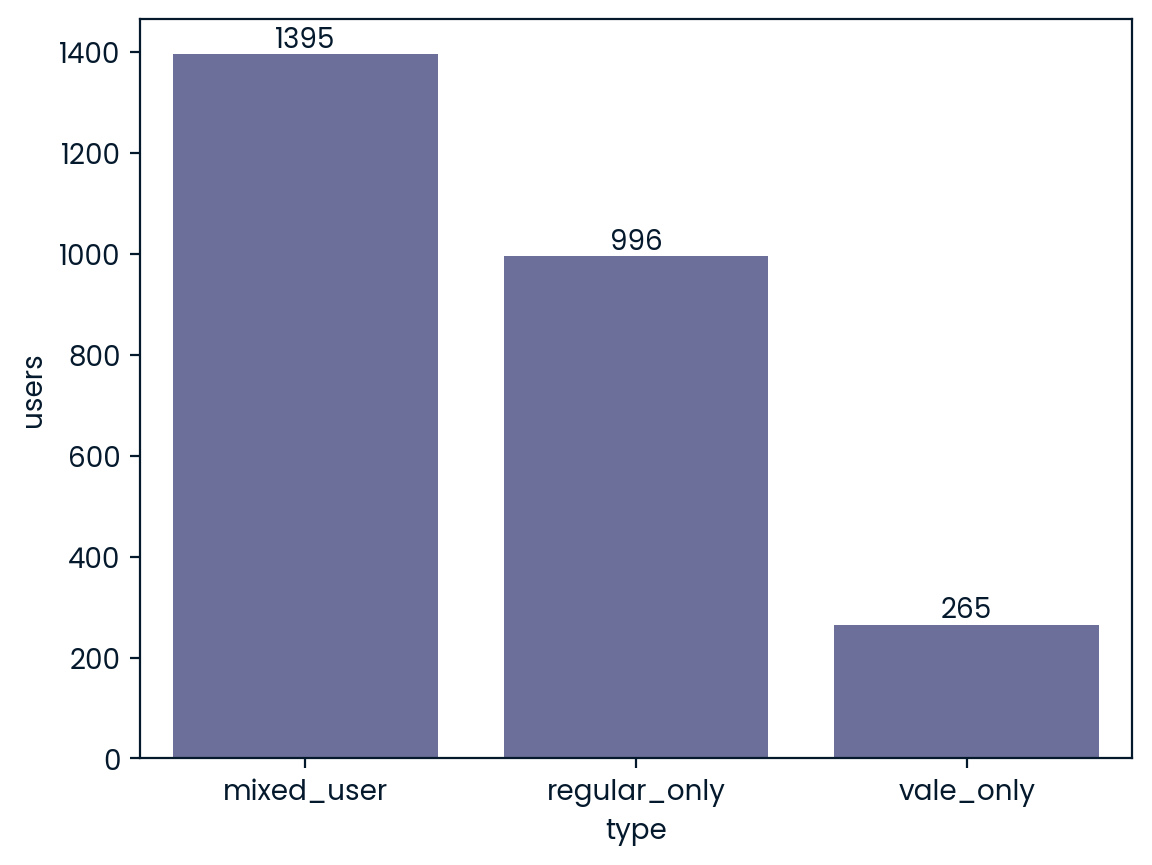

In [19]:

ax = sns.barplot(data=ads_users_grouped.reset_index(), x='type', y='users')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.show()

**VALE fulfills its product goal.**

VALE-only users (265 people)

- were not monetized via advertising prior to VALE.
- now they bring incremental revenue.

Without VALE, these $2.46 would not exist.

**Mixed users**

- generate approximately 8× higher average advertising than regular-only users
- meaning VALE does not cannibalize, but rather enhances ad monetization

**Regular-only**

- remains the baseline segment for comparison
- VALE does not “take away” revenue from it

**Total (in absolute figures):**
- Total income: **$65.71**.
- Income from Vale users only: **$3.23**.

This directly addresses the core objective of the task:
_VALE engages active users who don't make an IAP and generate incremental revenue, without harming traditional ads._

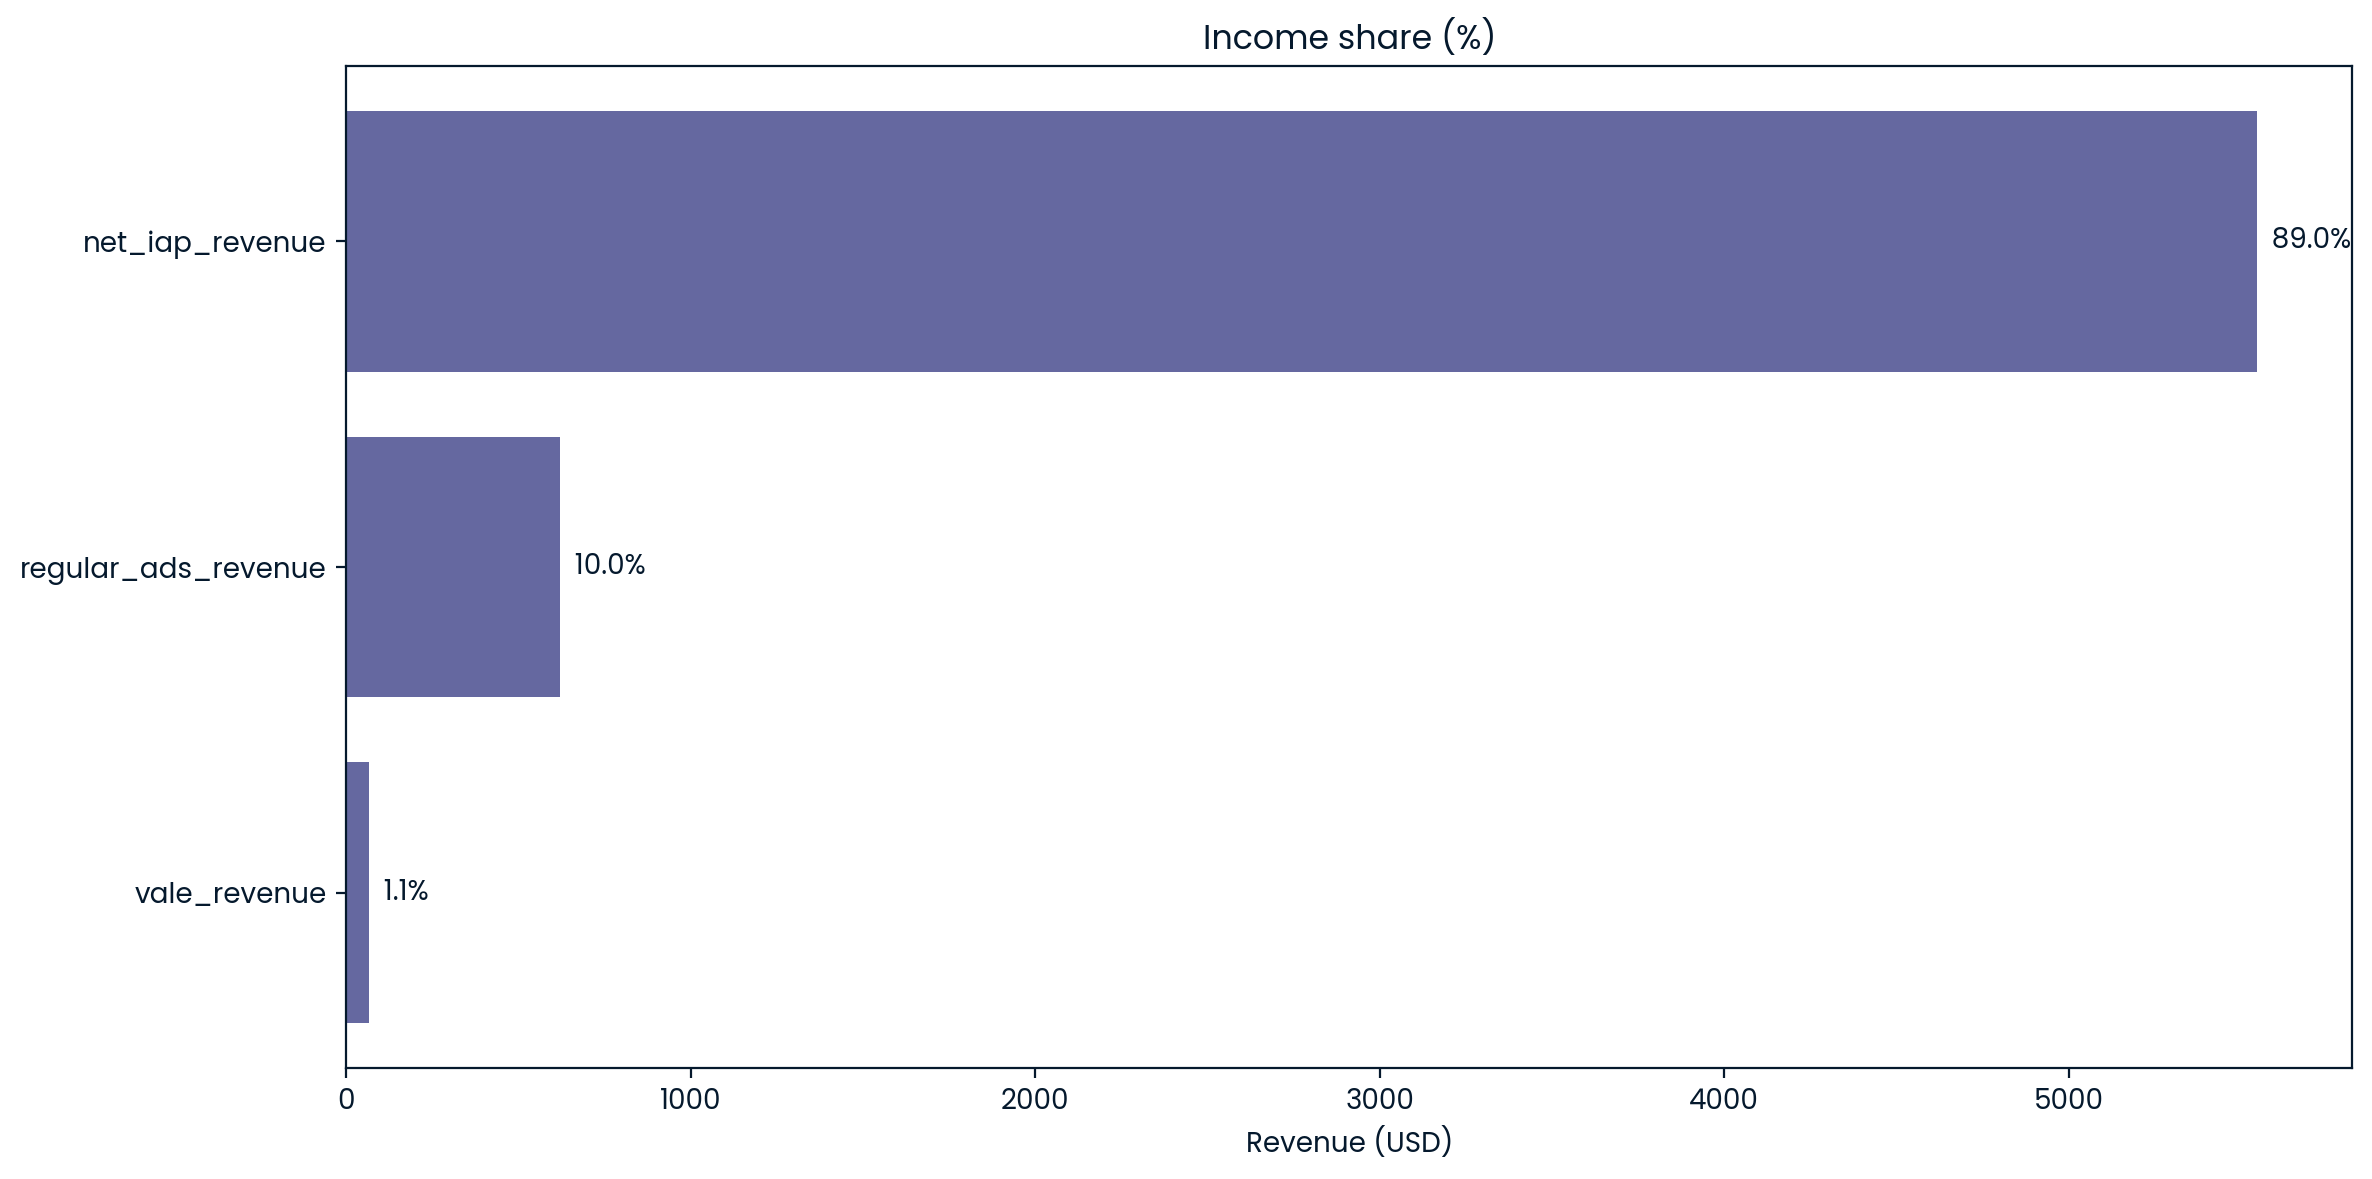

In [20]:
income = user_data_labeled[['net_iap_revenue', 'regular_ads_revenue', 'vale_revenue']].sum().to_frame(name='revenue')
income_sorted = income.sort_values(by='revenue', ascending=True)
pct = income_sorted / income_sorted.sum() * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(income_sorted.index, income_sorted['revenue'].values)

for y, (v, p) in enumerate(zip(income_sorted['revenue'].values, pct['revenue'].values)):
    ax.text(v, y, f"  {p:.1f}%", va="center")

ax.set_title("Income share (%)")
ax.set_xlabel("Revenue (USD)")
plt.tight_layout()
plt.show()

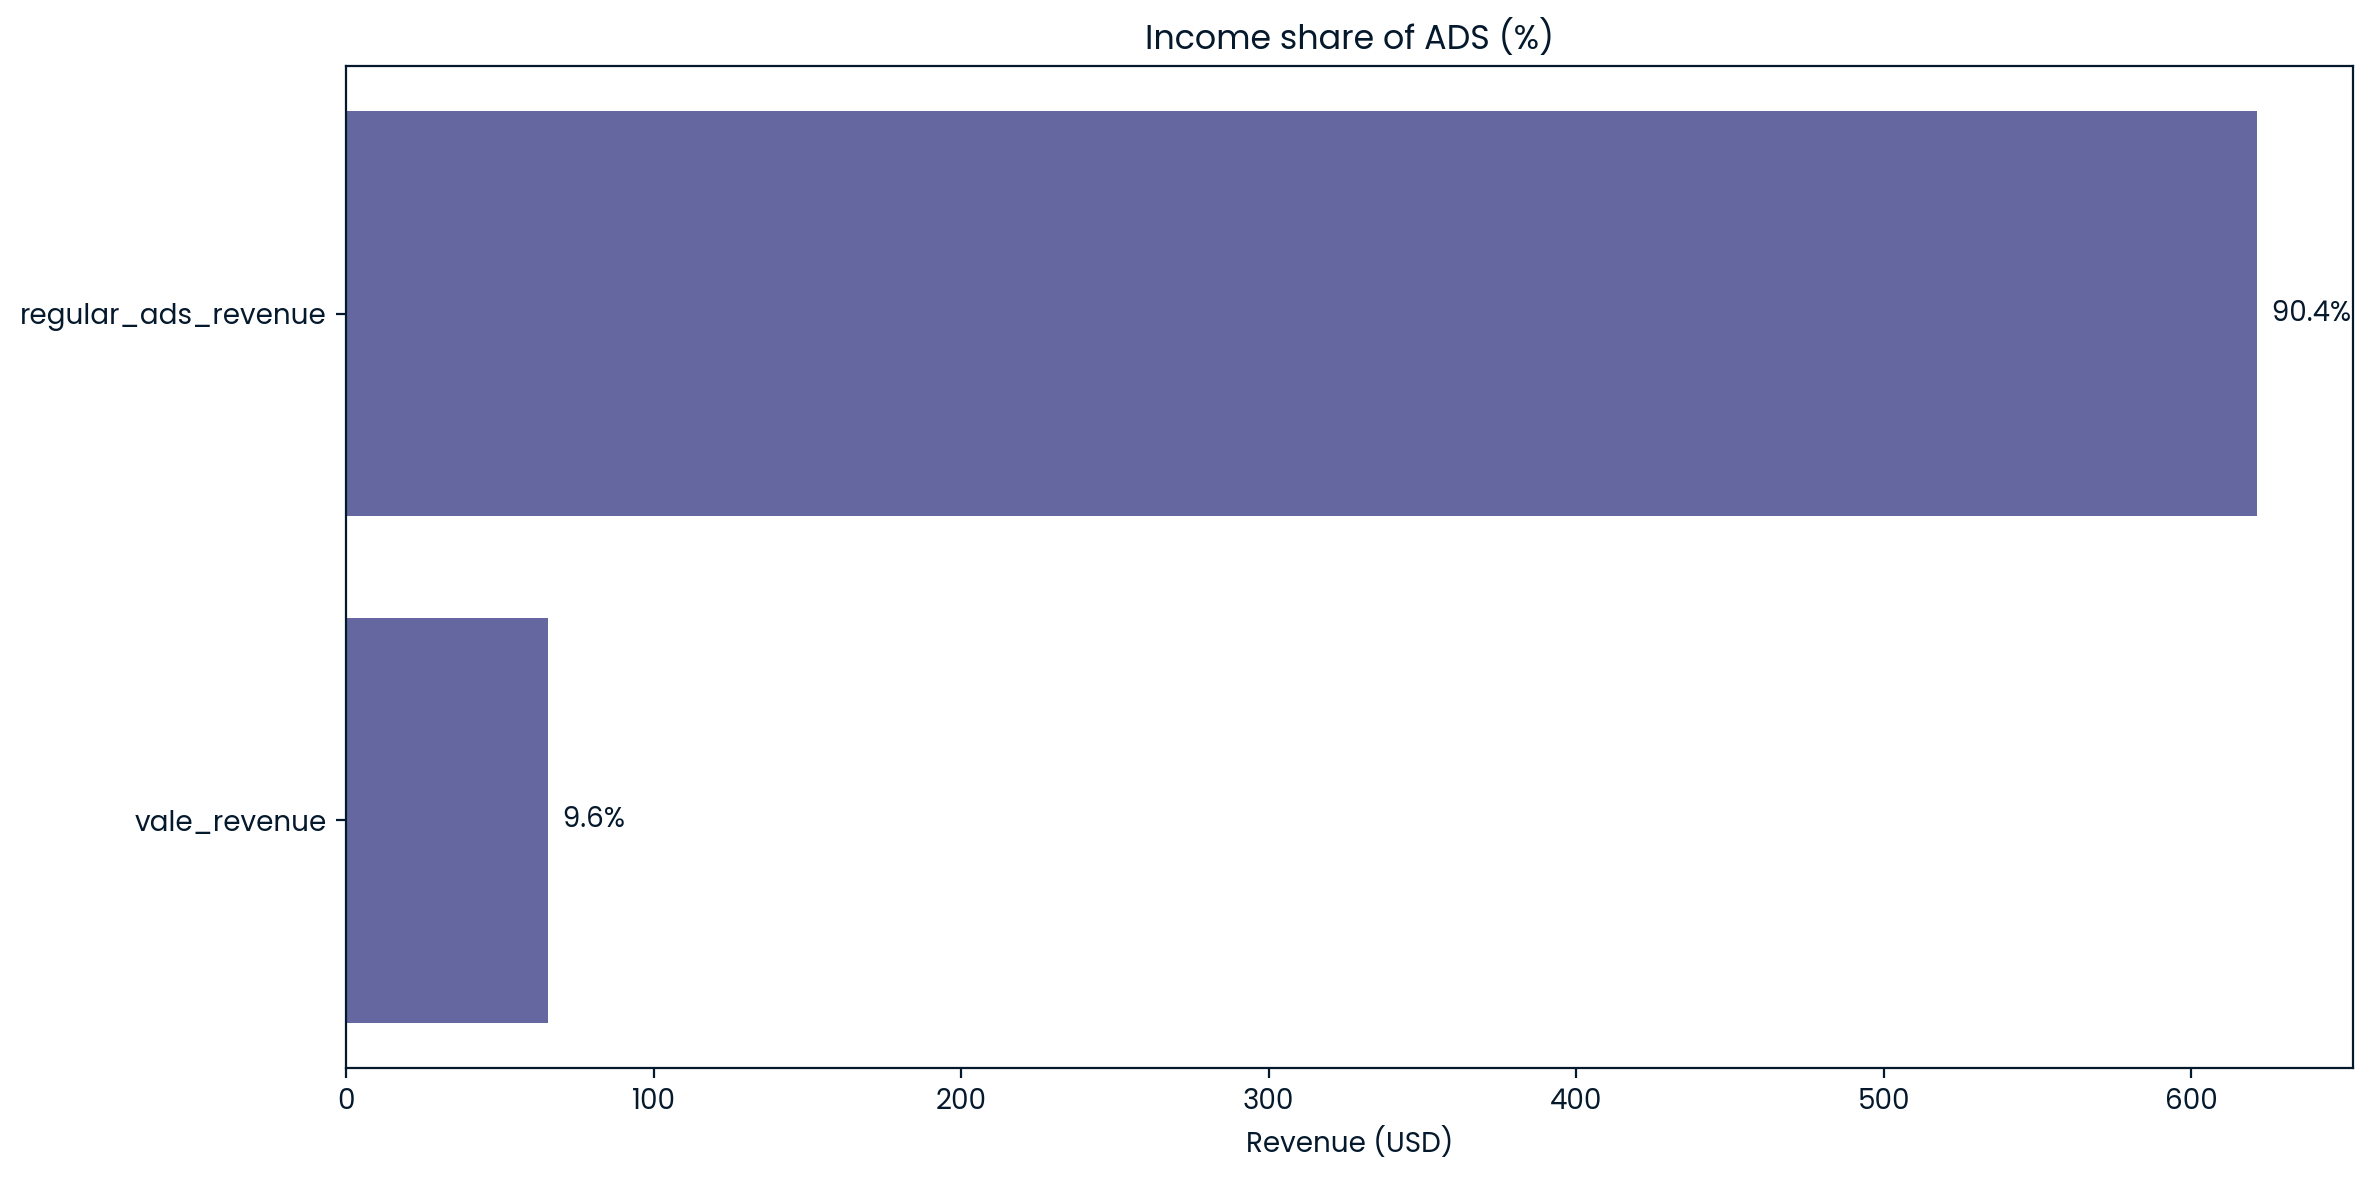

In [21]:
income_ads = user_data_labeled[['regular_ads_revenue', 'vale_revenue']].sum().to_frame(name='revenue')
income_ads_sorted = income_ads.sort_values(by='revenue', ascending=True) 
pct = income_ads_sorted / income_ads_sorted.sum() * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(income_ads_sorted.index, income_ads_sorted['revenue'].values)

for y, (v, p) in enumerate(zip(income_ads_sorted['revenue'].values, pct['revenue'].values)):
    ax.text(v, y, f"  {p:.1f}%", va="center")

ax.set_title("Income share of ADS (%)")
ax.set_xlabel("Revenue (USD)")
plt.tight_layout()
plt.show()

### Let's evaluate whether exposure to VALE ads is associated with lower consumption of regular ads at the user level.

In [22]:
user_data_labeled['regular_ads_count'] = user_data_labeled['total_ads_count'] - user_data_labeled['vale_count']

assert (user_data_labeled['regular_ads_count'] >= 0).all() #Just for cheking

user_level_ads = user_data_labeled[
    (user_data_labeled['regular_only'] | user_data_labeled['mixed_user']) 
    & (~user_data_labeled['is_payer'])
][['regular_ads_count', 'vale_count', 'total_ads_count']]

user_level_ads.head()

,regular_ads_count,vale_count,total_ads_count
global_user_id,,,
4297552523,45.0,32.0,77.0
4297710244,2584.0,169.0,2753.0
4297972055,1.0,0.0,1.0
4298171838,15.0,0.0,15.0
4298449850,77.0,4.0,81.0


In [23]:
def type_of_user(data):
    if data['vale_count']:
        return 'mixed'
    else:
        return 'regular_only'

user_level_ads['type'] = user_level_ads.apply(type_of_user, axis = 1)
user_level_ads_grouped = user_level_ads.groupby('type').agg(regular_ads_avg = ('regular_ads_count', 'mean'))
user_level_ads_grouped

,regular_ads_avg
type,
mixed,394.665233
regular_only,39.972892


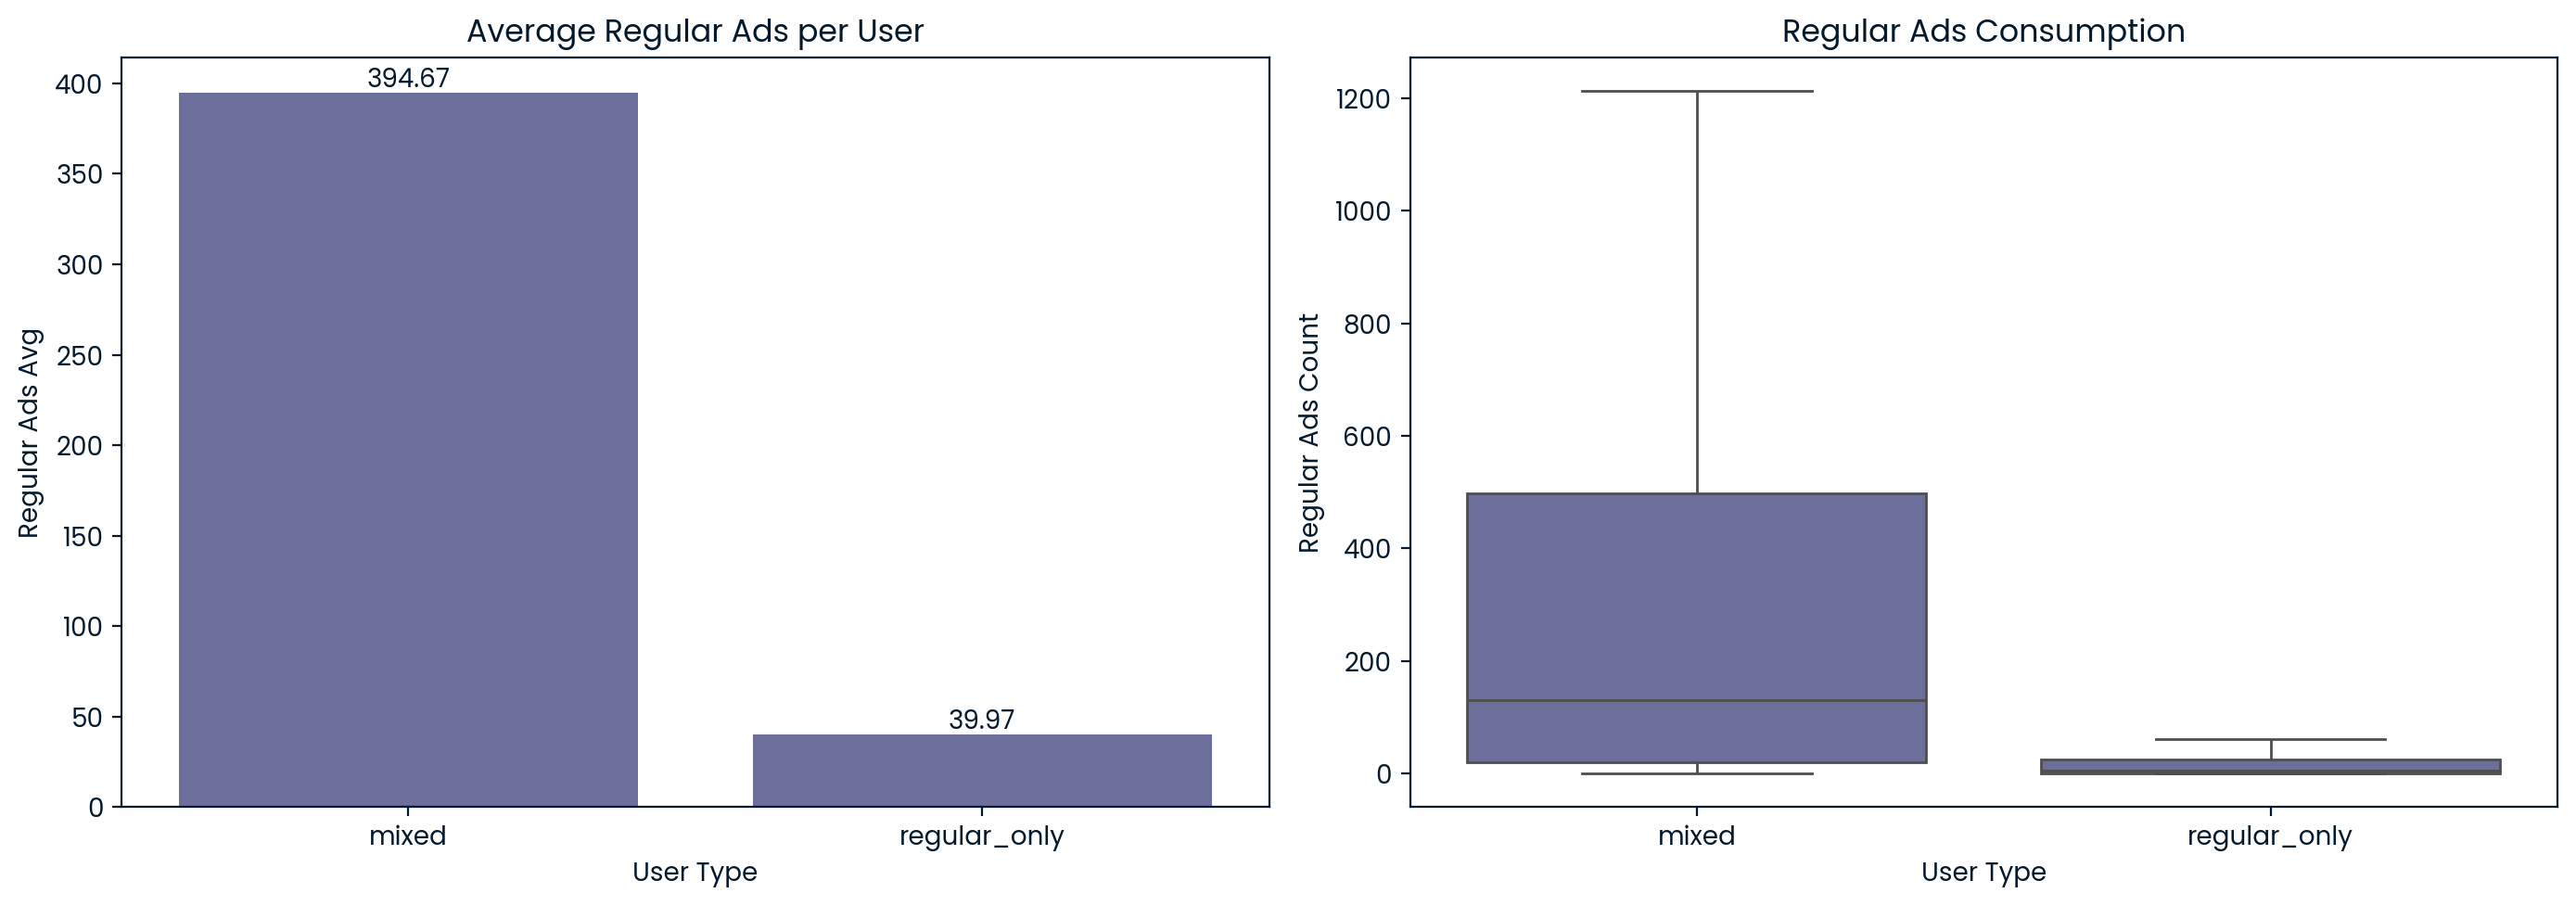

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot with annotations
ax1 = axes[0]
sns.barplot(
    data=user_level_ads_grouped.reset_index(),
    x='type',
    y='regular_ads_avg',
    ax=ax1
)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)
ax1.set_title('Average Regular Ads per User', fontsize=12)
ax1.set_xlabel('User Type')
ax1.set_ylabel('Regular Ads Avg')

# Boxplot
ax2 = axes[1]
sns.boxplot(
    data=user_level_ads,
    x='type',
    y='regular_ads_count',
    showfliers=False,
    ax=ax2
)
ax2.set_title('Regular Ads Consumption', fontsize=12)
ax2.set_xlabel('User Type')
ax2.set_ylabel('Regular Ads Count')

plt.tight_layout()
plt.show()

### Cannibalization Analysis (Preliminary)

We compare traditional ad consumption at the user level between:
- **regular-only users** (exposed only to regular ads)
- **mixed users** (exposed to both VALE and regular ads)

Mixed users show a higher average number of regular ad views than regular-only users.  
This suggests that **VALE exposure is not associated with reduced traditional ad consumption** (i.e., no evidence of cannibalization in this dataset).

**Limitations:** the dataset does not include user-level timelines (before/after VALE exposure), explicit rollout markers, or a control group. Therefore, the analysis is correlational and does not support causal claims or direct measurement of user migration between segments. A robust cannibalization assessment would require longitudinal data or an A/B test setup.


In [25]:
#Let's see the difference between the first vale ad and the last one (from the given data)
print(pd.to_datetime(max(ads[ads['is_vale']]['date'])) - pd.to_datetime(min(ads[ads['is_vale']]['date'])))

66 days 00:00:00


# VALE Ads Analysis  Summary 
**Business & Data Analytics Task**

## Project Goal

The objective of this analysis is to evaluate the impact of **VALE ads** on monetization among active users who:
- do not make in-app purchases (or make very few),
- are exposed to advertising,
- and to assess whether VALE ads increase total revenue **without cannibalizing traditional ads**.

The analysis is split into two main tasks.

**Data time coverage note**

VALE ad events in the dataset span approximately 66 days between the first and the last recorded VALE impression. This indicates that the analysis is based on a multi-week observation window rather than a short-term snapshot.

However, the dataset does not provide user-level timelines or explicit VALE rollout dates. As a result, the analysis remains cross-sectional and does not support before/after comparisons.

---
## Task 1 — VALE Revenue Contribution

### Question  
Do VALE ads generate incremental revenue among non-paying users, and what is their contribution compared to other revenue sources?

### Approach  
- Identified VALE ad impressions using a pattern in the `reason` field.
- Aggregated ad-level data to the user level.
- Split advertising revenue into:
  - VALE ads revenue
  - regular ads revenue
- Focused primarily on **non-paying users**, as VALE is intended to monetize this segment.

### Key Results  
- **Total VALE ad revenue:** ~65.7 USD  
- **Revenue from users exposed exclusively to VALE ads:** ~3.2 USD  
- The majority of VALE revenue is generated by users who view **both VALE and regular ads**, not by VALE-only users.

### Interpretation  
- VALE ads successfully generate additional advertising revenue (the share is **about 10%** of the total income received from advertising)
- VALE-only users represent a small but distinct segment.
- The main revenue contribution comes from users with mixed ad exposure, indicating that VALE ads complement existing monetization rather than replacing it.

---
## Task 2 — Cannibalization Analysis

### Question  
Do VALE ads reduce the consumption of traditional ads (i.e., cannibalize regular ad views)?

### Approach  
- Users were segmented into:
  - **Regular-only users** (only traditional ads)
  - **VALE-only users**
  - **Mixed users** (both VALE and traditional ads)
- Compared average regular ad consumption across segments at the user level.

### Key Findings  
- Users exposed to VALE ads (**mixed users**) view **more traditional ads on average** than users exposed only to regular ads.
- There is no evidence that VALE ads reduce traditional ad engagement.

### Interpretation  
This preliminary analysis suggests that **VALE ads do not cannibalize traditional ads**.  
Instead, VALE exposure is associated with **higher overall ad engagement** among non-paying users.

### Important Limitations  
The dataset does not include:
- temporal information (before vs. after VALE exposure),
- explicit user transitions between segments,
- or a controlled experimental setup.

Therefore:
- the analysis is **correlational**, not causal,
- user migration between ad types cannot be directly observed.

A definitive cannibalization assessment would require:
- user-level timelines,
- clear VALE rollout markers,
- or an A/B testing framework.

---
## Final Conclusion

Within the constraints of the available data:
- VALE ads contribute positively to advertising revenue.
- There is **no observed cannibalization** of traditional ads.
- VALE appears to act as a **complementary monetization mechanism** for non-paying users.

Further validation would require experimental or longitudinal data.